#### Exercise (homework)

Consolidate the excel into one DataFrame: you will need to create a 'YEAR' column. Think how you can iterate through all the DataFrames. Think also where you can take the value of 'YEAR' from.

In [1]:
#Import libraries
import pandas as pd

In [2]:
#Open document and see it

name_file = '207831-0-accidentes-trafico.xls'
sheet = '2009'
header = 7
df_test = pd.read_excel(name_file, sheet_name=sheet, header=header)

In [3]:
#Function for opening file depending on the sheet

def open_sheet_file(file_path, sheet):
    header = header_value(file_path, sheet)    
    return pd.read_excel(file_path, index_col=0, usecols="A:K", sheet_name=sheet, header=header)

In [4]:
#Function for finding the header value for each sheet

def header_value(file_path, sheet):
    header = 0
    for row in range(0,51):
        aux_file = pd.read_excel(file_path, sheet_name=sheet, header=row)
        if aux_file.keys()[0] == 'DISTRITO_ACCIDENTE':
            return row
    raise ValueError ('Header cannot be more than 50')

In [5]:
#Function for adding year column for each sheet

def add_year_column(dataframe, year):
    dataframe['YEAR'] = year
    return dataframe

In [6]:
### Algorithm for joining sheets ###

#Open file for finding names of sheets for 'for' loop
name_file = '207831-0-accidentes-trafico.xls'
df_start = pd.read_excel(name_file,sheet_name=None)

#Create empty dataframe for final dataframe
df_final = pd.DataFrame()

#Loop for opening and joining sheets
for sheet in df_start.keys():
    if df_final.empty:
        df_final = open_sheet_file(name_file, sheet)
        df_final = add_year_column(df_final, sheet)
        df_final.drop('Total', inplace=True)
    else:
        df_aux = open_sheet_file(name_file, sheet)
        df_aux = add_year_column(df_aux, sheet)
        df_aux.drop('Total', inplace=True)
        df_final = df_final.append(df_aux)
        
#Showing result
df_final    

,COLISIÓN DOBLE,COLISIÓN MÚLTIPLE,CHOQUE CON OBJETO FIJO,ATROPELLO,VUELCO,CAÍDA MOTOCICLETA,CAÍDA CICLOMOTOR,CAÍDA BICICLETA,CAÍDA VIAJERO BUS,OTRAS CAUSAS,YEAR
DISTRITO_ACCIDENTE,,,,,,,,,,,
ARGANZUELA,389,54,126,75,9.0,43,9.0,4.0,5.0,8.0,2009
BARAJAS,89,6,53,21,NaN,12,2.0,1.0,2.0,2.0,2009
CARABANCHEL,375,44,171,137,8.0,36,13.0,6.0,9.0,8.0,2009
CENTRO,514,55,171,143,NaN,61,12.0,3.0,10.0,12.0,2009
CHAMARTIN,494,70,133,92,10.0,72,22.0,2.0,6.0,7.0,2009
CHAMBERI,414,35,87,87,3.0,51,12.0,4.0,4.0,5.0,2009
CIUDAD LINEAL,398,64,124,101,3.0,57,17.0,5.0,4.0,4.0,2009
FUENCARRAL-EL PARDO,321,47,151,78,11.0,34,16.0,7.0,2.0,8.0,2009
HORTALEZA,215,16,109,58,3.0,29,13.0,7.0,4.0,4.0,2009


# Let's play with the data

In [7]:
#Import libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [8]:
#Add total accidents column
df_final['TOTAL BY DISTRICT'] = df_final.sum(axis=1)

In [9]:
#Which distrit has had more accidents
by_district = df_final.groupby('DISTRITO_ACCIDENTE').sum()
by_district.sort_values('TOTAL BY DISTRICT', ascending=False)

,COLISIÓN DOBLE,COLISIÓN MÚLTIPLE,CHOQUE CON OBJETO FIJO,ATROPELLO,VUELCO,CAÍDA MOTOCICLETA,CAÍDA CICLOMOTOR,CAÍDA BICICLETA,CAÍDA VIAJERO BUS,OTRAS CAUSAS,TOTAL BY DISTRICT
DISTRITO_ACCIDENTE,,,,,,,,,,,
CENTRO,3937,333,1227,1129,13.0,655,103.0,131.0,54.0,56.0,7638.0
SALAMANCA,4233,501,1005,752,24.0,799,122.0,64.0,62.0,39.0,7601.0
CHAMARTIN,3841,534,979,661,57.0,667,106.0,45.0,47.0,48.0,6985.0
CIUDAD LINEAL,3138,475,1012,735,51.0,467,98.0,50.0,35.0,36.0,6097.0
PUENTE DE VALLECAS,2811,417,1203,911,46.0,254,84.0,54.0,46.0,45.0,5871.0
CARABANCHEL,2893,357,1097,914,30.0,290,85.0,69.0,56.0,29.0,5820.0
MONCLOA-ARAVACA,2457,467,1389,485,77.0,465,56.0,147.0,35.0,40.0,5618.0
CHAMBERI,3188,246,576,735,5.0,564,89.0,55.0,28.0,31.0,5517.0
FUENCARRAL-EL PARDO,2543,327,1142,616,85.0,308,85.0,120.0,24.0,31.0,5281.0


In [10]:
#Which year was the worst
by_year = df_final.groupby('YEAR').sum()
by_year.sort_values('TOTAL BY DISTRICT', ascending=False)

,COLISIÓN DOBLE,COLISIÓN MÚLTIPLE,CHOQUE CON OBJETO FIJO,ATROPELLO,VUELCO,CAÍDA MOTOCICLETA,CAÍDA CICLOMOTOR,CAÍDA BICICLETA,CAÍDA VIAJERO BUS,OTRAS CAUSAS,TOTAL BY DISTRICT
YEAR,,,,,,,,,,,
2009,6498,790,2390,1582,98.0,768,231.0,76.0,93.0,134.0,12660.0
2016,6258,796,1965,1560,75.0,1089,212.0,273.0,93.0,65.0,12386.0
2011,6238,776,2108,1566,76.0,803,185.0,114.0,75.0,62.0,12003.0
2014,6056,769,1997,1483,94.0,987,150.0,232.0,89.0,78.0,11935.0
2015,6121,736,1804,1525,60.0,983,166.0,239.0,85.0,63.0,11782.0
2013,6157,723,1975,1486,67.0,927,137.0,140.0,76.0,61.0,11749.0
2012,6170,784,1974,1496,92.0,774,187.0,126.0,69.0,74.0,11746.0
2010,6118,745,2036,1570,110.0,691,188.0,81.0,105.0,84.0,11728.0


In [11]:
by_year.index

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], dtype='object', name='YEAR')

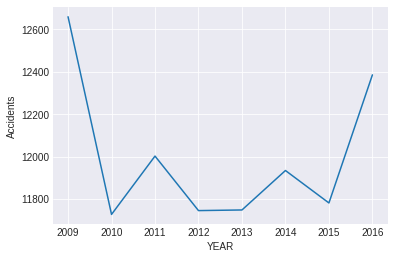

In [12]:
X = by_year.index
Y = by_year['TOTAL BY DISTRICT']
plt.plot(X, Y)
plt.xlabel('YEAR')
plt.ylabel('Accidents')
plt.show()

In [52]:
df_final.keys()

Index(['COLISIÓN DOBLE                          ',
       'COLISIÓN MÚLTIPLE                       ',
       'CHOQUE CON OBJETO FIJO                  ',
       'ATROPELLO                               ',
       'VUELCO                                  ',
       'CAÍDA MOTOCICLETA                       ',
       'CAÍDA CICLOMOTOR                        ',
       'CAÍDA BICICLETA                         ',
       'CAÍDA VIAJERO BUS                       ',
       'OTRAS CAUSAS                            ', 'YEAR',
       'TOTAL BY DISTRICT'],
      dtype='object')

In [63]:
df_final.columns = df_final.columns.str.strip()

In [76]:
df_motos = df_final[['CAÍDA BICICLETA','CAÍDA MOTOCICLETA', 'CAÍDA CICLOMOTOR', 'YEAR']]

In [78]:
df_motos

,CAÍDA BICICLETA,CAÍDA MOTOCICLETA,CAÍDA CICLOMOTOR,YEAR
DISTRITO_ACCIDENTE,,,,
ARGANZUELA,4.0,43,9.0,2009
BARAJAS,1.0,12,2.0,2009
CARABANCHEL,6.0,36,13.0,2009
CENTRO,3.0,61,12.0,2009
CHAMARTIN,2.0,72,22.0,2009
CHAMBERI,4.0,51,12.0,2009
CIUDAD LINEAL,5.0,57,17.0,2009
FUENCARRAL-EL PARDO,7.0,34,16.0,2009
HORTALEZA,7.0,29,13.0,2009


In [79]:
df_motos.groupby('DISTRITO_ACCIDENTE').sum()

,CAÍDA BICICLETA,CAÍDA MOTOCICLETA,CAÍDA CICLOMOTOR
DISTRITO_ACCIDENTE,,,
ARGANZUELA,60.0,355,76.0
BARAJAS,17.0,84,21.0
CARABANCHEL,69.0,290,85.0
CENTRO,131.0,655,103.0
CHAMARTIN,45.0,667,106.0
CHAMBERI,55.0,564,89.0
CIUDAD LINEAL,50.0,467,98.0
FUENCARRAL-EL PARDO,120.0,308,85.0
HORTALEZA,65.0,220,75.0


In [82]:
Y_bicis = df_motos['CAÍDA BICICLETA']
Y_motos = df_motos['CAÍDA MOTOCICLETA']
Y_ciclos = df_motos['CAÍDA CICLOMOTOR']
X = df_motos.index

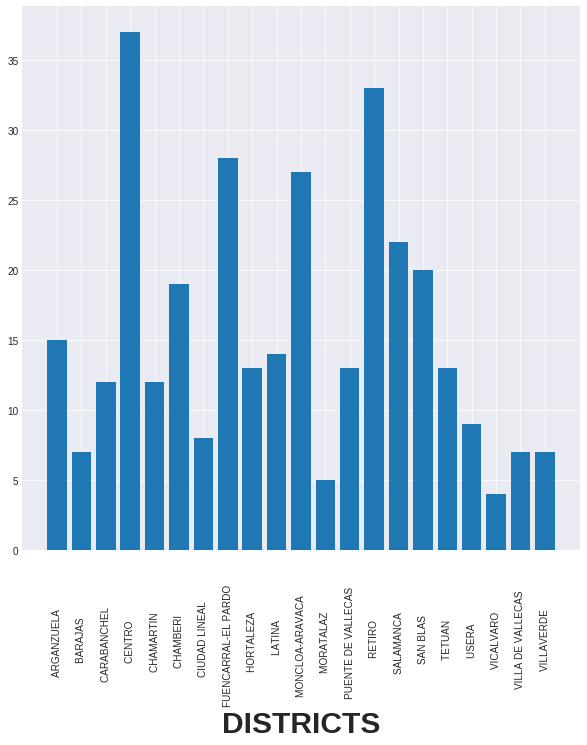

In [117]:
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.xlabel('DISTRICTS', fontsize=30, fontweight=1000)
plt.bar(X, Y_bicis)
plt.show()